In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
df_x = pd.read_csv('../data/data_input_001.csv', index_col=0)
df_y = pd.read_csv('../data/data_output_001.csv', index_col=0)
display(df_x, df_y)

,x1,x2,x3
0,5.211856,3.849401,-0.183180
1,5.211856,3.849401,0.046188
2,5.211856,3.849401,-0.049773
3,5.211856,3.849401,-0.381295
4,5.211856,3.849401,-0.349120
...,...,...,...
24995,-5.575664,-0.809402,0.022162
24996,-5.575664,-0.809402,-0.343465
24997,-5.575664,-0.809402,0.464218
24998,-5.575664,-0.809402,-0.308300


,y1,y2
0,-1.638082,-1.801888
1,-1.599566,-1.592669
2,-1.541234,-1.780504
3,-1.650795,-1.928039
4,-1.732432,-1.960724
...,...,...
24995,1.258734,1.265430
24996,1.415776,0.974667
24997,1.307663,1.817155
24998,1.266246,1.096351


<IPython.core.display.Javascript object>


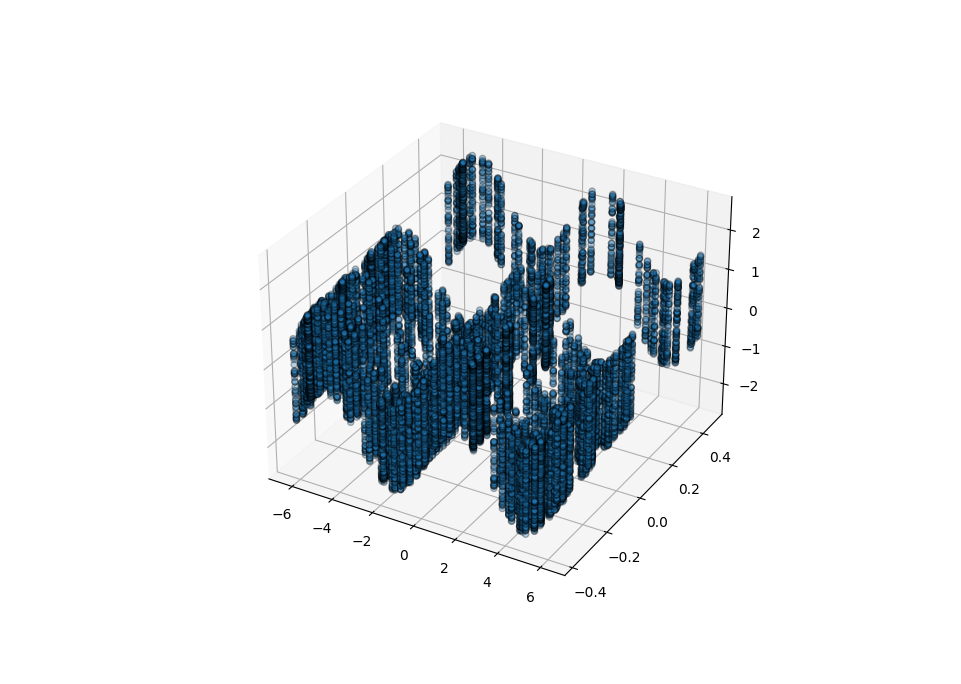

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

ax.scatter(df_x['x1'],df_x['x3'],df_y['y2'],
          alpha=0.3,
          edgecolor='black')

In [4]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X = df_x[['x1','x2','x3']].values
Y = df_y[['y2']].values
x_s = sc_x.fit_transform(X)
y_s = sc_y.fit_transform(Y)

regressor = SVR(kernel = 'rbf')
regressor.fit(x_s,np.ravel(y_s))

SVR()

In [5]:
y_pred = regressor.predict(x_s)
Y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))


In [7]:
num = 100

surface_x1 = np.linspace(min(df_x.x1),max(df_x.x1),num)
surface_x2 = np.linspace(min(df_x.x2),max(df_x.x2),num)
surface_x3 = np.linspace(min(df_x.x3),max(df_x.x3),num)

xx1,xx2, xx3 = np.meshgrid(surface_x1,surface_x2, surface_x3)
XX = np.c_[np.ravel(xx1),np.ravel(xx2), np.ravel(xx3)]
XX_s = sc_x.transform(XX)

surface_y = regressor.predict(XX_s).reshape(xx1.shape)
surface_y = sc_y.inverse_transform(surface_y.reshape(num,num))

ValueError: cannot reshape array of size 1000000 into shape (100,100)

In [14]:
display(xx1.shape, xx2.shape,surface_y[:,:,0].shape)

(100, 100, 100)

(100, 100, 100)

(100, 100)

<IPython.core.display.Javascript object>


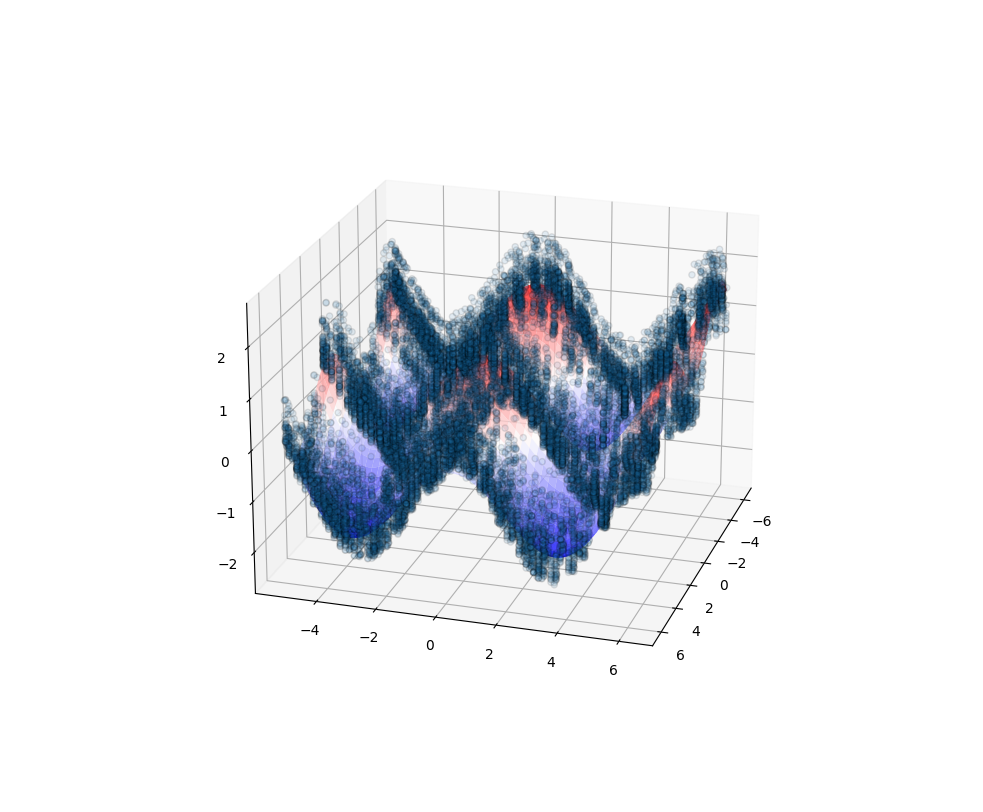

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_x['x1'], df_x['x2'], df_y['y2'], alpha=0.1, edgecolor='black')
ax.plot_surface(xx1[:,:,0], xx2[:,:,0], surface_y[:,:,0], cmap='bwr', linewidth=0, alpha=0.8) 

In [17]:
fig = plt.figure(figsize=(5, 5), dpi=200)

ax = fig.add_subplot(111)

ax.scatter(Y_pred,Y,
          alpha=0.2,
          edgecolor='black',
          s=10)

ax.plot([-10,10],[-10,10],c='r')

plt.title("True Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.grid('True')
plt.xlim(-3,3)
plt.ylim( -3,3)
plt.tight_layout()

YY = Y-Y_pred
print('Mean: ', np.mean(YY))
print('std: ', np.std(YY))
print('MAE: ', np.mean(np.abs(YY)))
print('MSE: ', np.sqrt(sklearn.metrics.mean_squared_error(Y,Y_pred)))
print('R-squred: ', sklearn.metrics.r2_score(Y,Y_pred))
print('Maximum Error: ', np.max(np.abs(YY)))


<IPython.core.display.Javascript object>

Mean:  0.00892890572458365
std:  0.3062020362034023
MAE:  0.24273608664631172
MSE:  0.3063321927786047
R-squred:  0.9091133865795611
Maximum Error:  1.318600501590819
